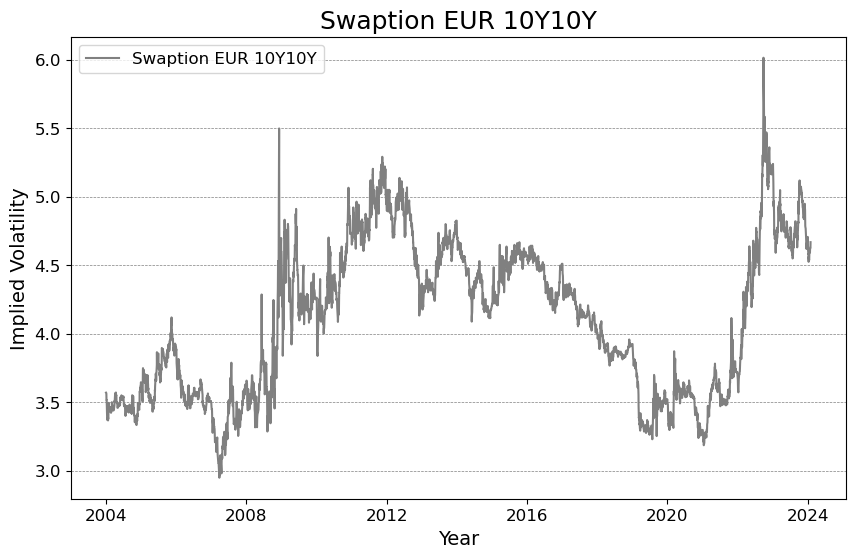

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATM_10Y_10Y_from_2004_2024.xlsx', sheet_name='Ark1', engine='openpyxl')

plt.figure(figsize=(10, 6))
plt.plot(df["Dato"],df["ATM_10Y_10Y"], color='grey', label= 'Swaption EUR 10Y10Y')
plt.title('Swaption EUR 10Y10Y', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Implied Volatility', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

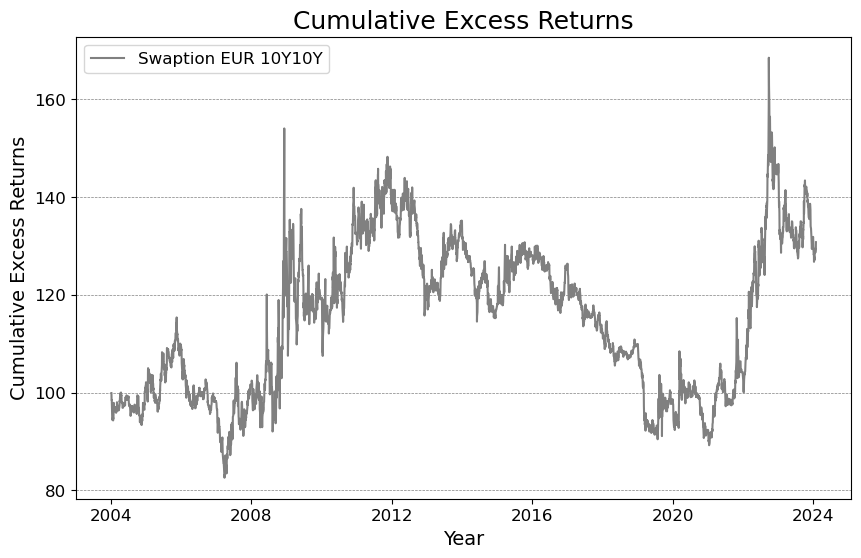

In [30]:
df['Returns'] = df["ATM_10Y_10Y"].pct_change()
    
# Assuming risk-free rate is 0, so excess returns are equal to actual returns in this case
df['Excess Returns'] = df['Returns']
    
# Calculate cumulative excess returns
df['Cumulative Excess Returns'] = (1 + df['Excess Returns']).cumprod()*100

plt.figure(figsize=(10, 6))
plt.plot(df["Dato"],df['Cumulative Excess Returns'], color='grey', label= 'Swaption EUR 10Y10Y')
plt.title('Cumulative Excess Returns', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Excess Returns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

/Users/nannaingemannohrt/anaconda3/envs/master_thesis_venv/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


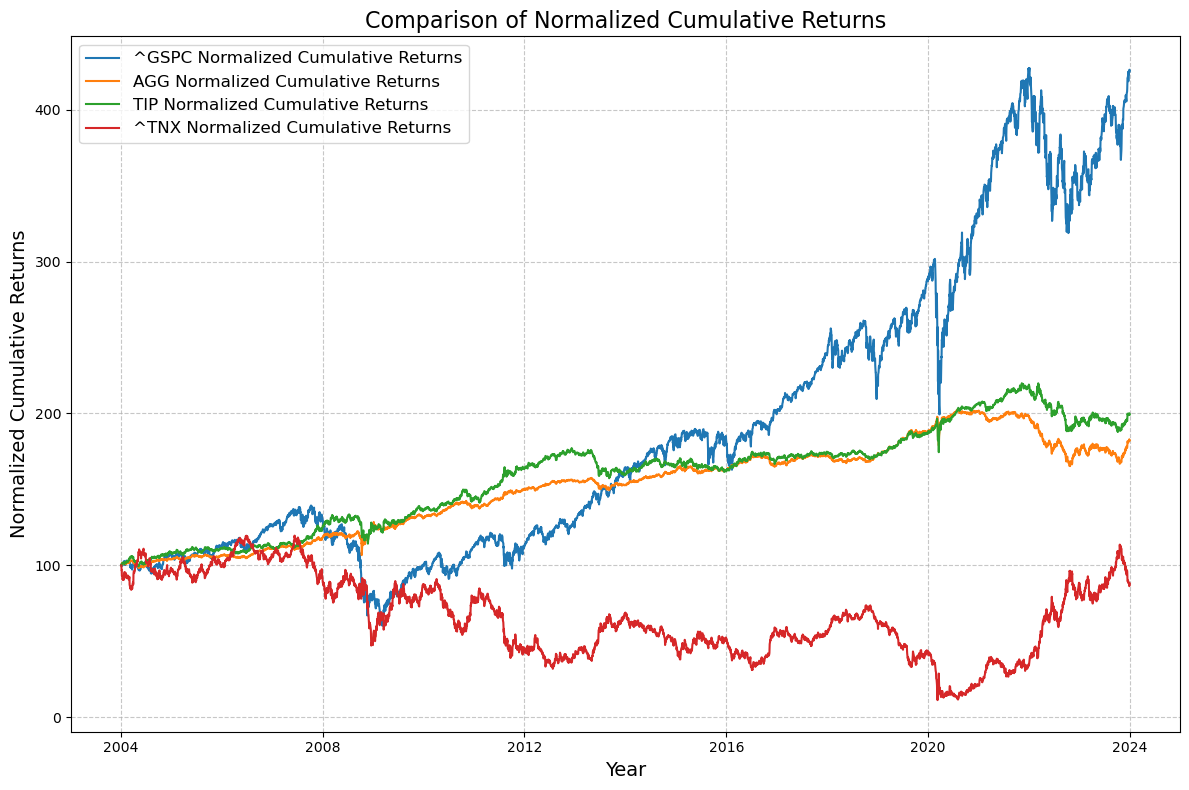

In [31]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Tickers for equities (S&P 500), nominal bonds (AGG), inflation-linked bonds (TIP), and 10-Year Treasury Yield (^TNX)
tickers = ['^GSPC', 'AGG', 'TIP', '^TNX']

# Start and end dates for the data
start_date = '2004-01-01'
end_date = '2024-01-01'

plt.figure(figsize=(12, 8))

for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    data['Returns'] = data['Adj Close'].pct_change()
    
    # Calculate cumulative returns
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    
    # Normalize starting point to 100 for comparison
    initial_value = data['Cumulative Returns'].dropna().iloc[0]
    data['Normalized Returns'] = data['Cumulative Returns'] / initial_value * 100
    
    # Plot the normalized cumulative returns for each ticker
    plt.plot(data.index, data['Normalized Returns'], label=f'{ticker} Normalized Cumulative Returns')

# Adjust plot settings for better visualization
plt.title('Comparison of Normalized Cumulative Returns', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Cumulative Returns', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
